In [2]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak


## Get file and TTree, print branches, convert to array

In [3]:
piplus_events = ur.open("sim_pionplus.root:events")
pi0_events = ur.open("sim_pion0.root:events")

In [4]:
def get_vector(events,varname='HcalEndcapHits',energy='energyDeposit'):
    E = events["%s.%s"%(varname,energy)].array(library='np')
    x = events["%s.position.x"%varname].array(library='np')
    y = events["%s.position.y"%varname].array(library='np')
    z = events["%s.position.z"%varname].array(library='np')
    #theta = events["%s.polar.theta"%varname].array(library='np')
    #phi = events["%s.polar.phi"%varname].array(library='np')

    return E,x, y, z, theta, phi

def get_truth():
    pdgID = gen_events['mcparticles.pdgID'].array(library='np')
    status = gen_events['mcparticles.status'].array(library='np')
    genStatus = gen_events['mcparticles.genStatus'].array(library='np')
    pex = gen_events['mcparticles.psx'].array(library='np')
    pey = gen_events['mcparticles.psy'].array(library='np')
    pez = gen_events['mcparticles.psz'].array(library='np')
    mass = gen_events['mcparticles.mass'].array(library='np')

    return pdgID,status, genStatus,pex,pey,pez,mass

In [5]:
E = {}
x = {}
y = {}
z  = {}
theta={}
phi = {}

## Get data

# get hits

In [6]:

for i in ['HcalHadronEndcap','EcalEndcapP']:#,'TrackerEndcap','VertexEndcap']:
    tag = 'piplus_' + i
    E[tag], x[tag], y[tag],z[tag],theta[tag],phi[tag] = get_vector(piplus_events,varname="%sHits"%i)
    tag = 'pi0_' + i
    E[tag], x[tag], y[tag],z[tag],theta[tag],phi[tag] = get_vector(pi0_events,varname="%sHits"%i)



## Get clusters

In [7]:
#for i in ['HcalBarrelClusters','HcalHadronEndcapClusters','EcalBarrelClusters','EcalEndcapClusters']:
#    E[i], x[i], y[i],z[i] = get_vector("%s"%i,energy='energy')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [9]:
print(x.keys())

dict_keys(['piplus_HcalHadronEndcap', 'pi0_HcalHadronEndcap', 'piplus_EcalEndcapP', 'pi0_EcalEndcapP'])


## Plot 2D transverse view for hits in endcap

<ipython-input-10-fe0e52125514>:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_x = x[key][ievt][mask]
<ipython-input-10-fe0e52125514>:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_y = y[key][ievt][mask]
<ipython-input-10-fe0e52125514>:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_E = E[key

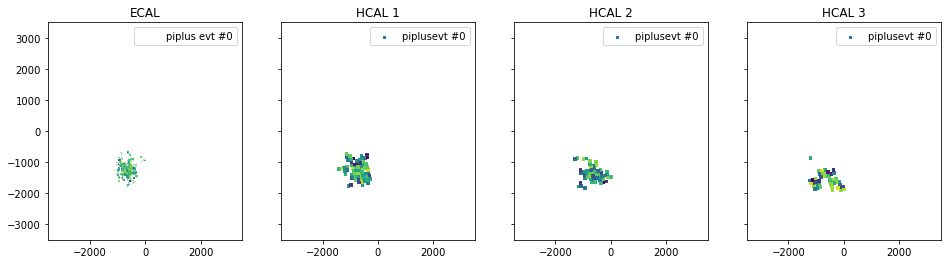

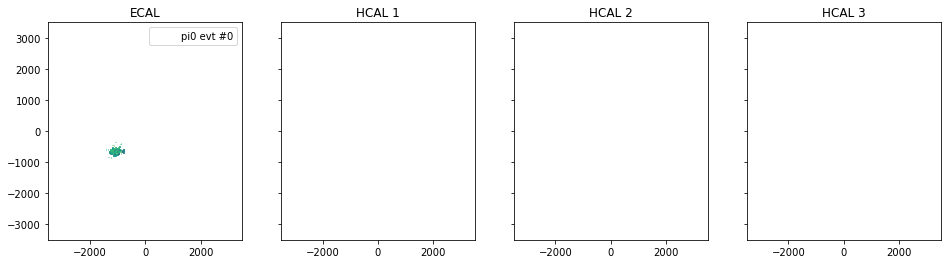

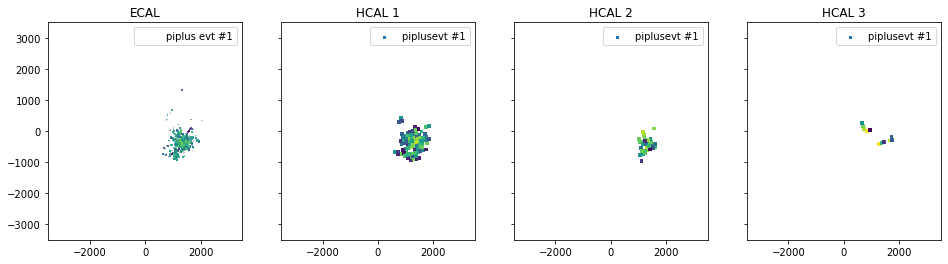

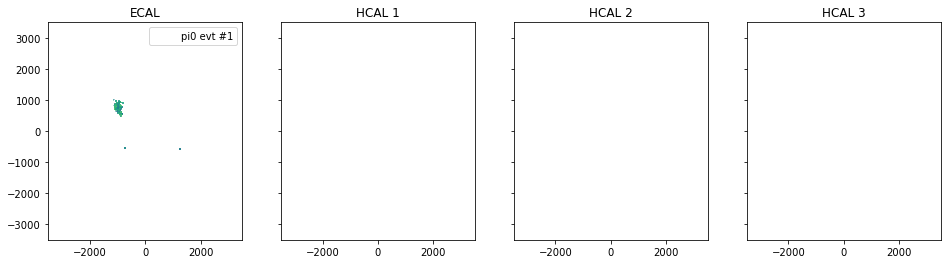

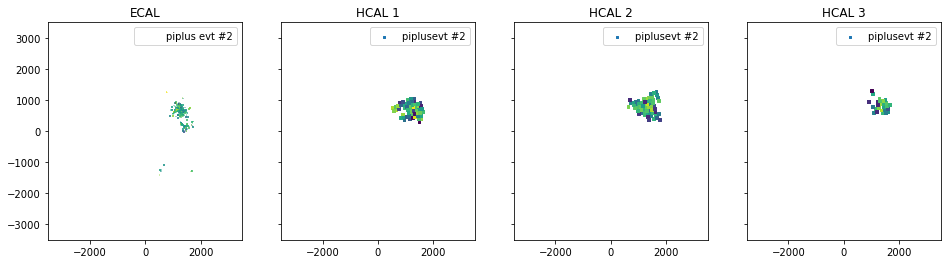

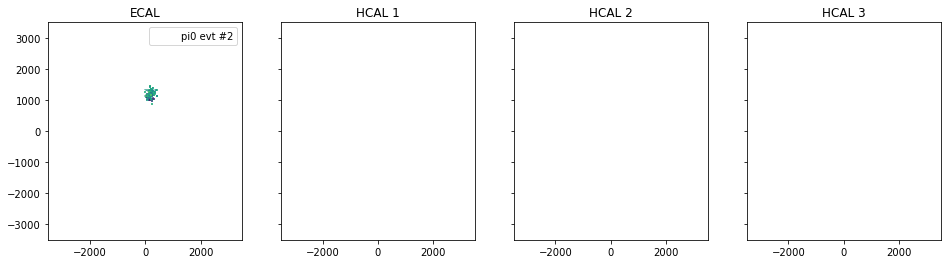

In [10]:
desired_data_width = {}
desired_data_width['EcalEndcapP'] = 20 #mm
desired_data_width['HcalHadronEndcap'] = 100 # mm

#loop over events

for ievt in range(3):
    for part_type in ['piplus','pi0']:
        #print(ievt)
        fig,ax  = plt.subplots(1,4,figsize=(16,4),sharex=True, sharey=True)
        ax[0].set_ylim([-3500,3500])
        ax[0].set_xlim([-3500,3500])
        M = ax[0].transData.get_matrix()
        xscale = M[0,0]
        yscale = M[1,1]
        key = '%s_EcalEndcapP'%(part_type)

        c = ax[0].scatter(x[key][ievt], y[key][ievt], c=E[key][ievt],marker='s',s=(xscale*desired_data_width['EcalEndcapP'])**2,
                      cmap='viridis',alpha=0.85,norm=LogNorm(),label=part_type + ' evt #%i'%(ievt))
        ax[0].legend()

        #### HCAL 
        key = '%s_HcalHadronEndcap'%(part_type)
        for iz, zbins in enumerate([(3000,3200),(3200,3400),(3400,3600)]):
            mask = [(z[key][ievt]>zbins[0]) & (z[key][ievt]<zbins[1])]
            if(np.sum(mask)<1): continue
            cell_x = x[key][ievt][mask]
            cell_y = y[key][ievt][mask]
            cell_E = E[key][ievt][mask]
            c = ax[iz+1].scatter(cell_x, cell_y, c=cell_E,marker='s',
                      s=(xscale*desired_data_width['HcalHadronEndcap'])**2,cmap='viridis', norm=LogNorm(),label=part_type + 'evt #%i'%(ievt))
            
            ax[iz+1].legend()

        ax[0].set_title('ECAL')
        ax[1].set_title('HCAL 1')
        ax[2].set_title('HCAL 2')
        ax[3].set_title('HCAL 3')
        ax[0].legend()


In [ ]:
#sf_ECAL = 0.253
#sf_HCAL = 0.025
    #print('Energy = %2.3f'%(suma_ECAL/sf_ECAL+suma_HCAL/sf_HCAL))
    ##suma_HCAL = np.sum(E[key][ievt])
    #print(suma_HCAL/sf_HCAL)